In [ ]:
# 这个库在python中是用来进行画图
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sklearn 

#  pandas是在python中进行处理数据的库
import pandas as pd
import os,sys,time
 
import tensorflow as tf
# keras有两类keras。我们可以自己进行选择，使用ts-keras还是keras。
# import keras。在这里我们使用tensorflow-keras
from tensorflow import keras

# 我们先进行打印一下我们所有的依赖库的版本号
print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)





In [5]:

# 我们使用keras来搭建一个分类模型.我们学习使用分类模型的，
# 我们可以kera内置的数据集。导入数据集fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist
# 我们从这个kera内置的数据集fashion_mnist拆分出训练集和测试集
# python中通过变量
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
# 一般情况下，我们需要将训练集拆分成训练集和验证集
# 我们使用前 5000张作为验证集，然后使用其余的图片作为选连接
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]
 
# 我们依次打印训练集、验证集、测试集的数据
print("====================训练集======================")
print(x_train.shape,y_train.shape)
print("====================验证集======================")
print(x_valid.shape,y_valid.shape)
print("====================测试集======================")
print(x_test.shape,y_test.shape)



====================训练集======================
(55000, 28, 28) (55000,)
====================验证集======================
(5000, 28, 28) (5000,)
====================测试集======================
(10000, 28, 28) (10000,)


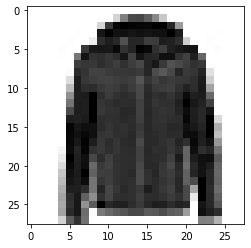

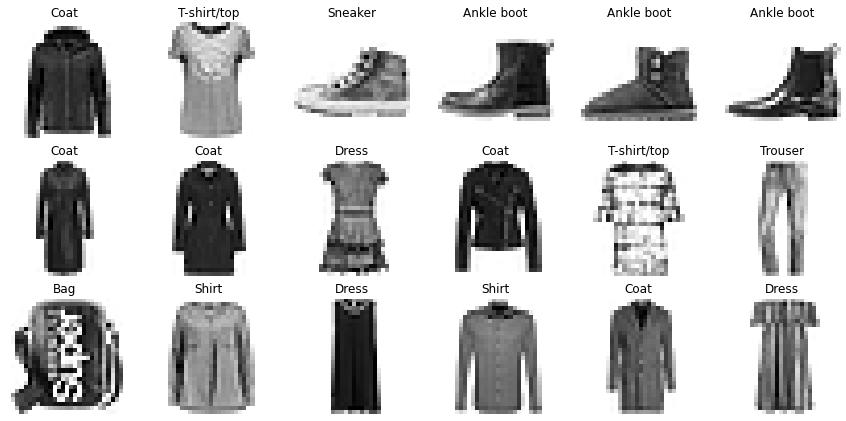

In [7]:
def show_single_image(img_array):
    #  matplotlib.pyplot   
    plt.imshow(img_array,cmap="binary")
    plt.show()

    
show_single_image(x_train[0])

# 这个我们是从Tensorflow官网上面找到的。这个fashion_mnist数据集中各个图像对应的类别
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_all_images(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data) == len(y_data)
    # 这里是需要断言，我们打印的数据数量不能大约原始数据集的数量
    assert n_rows * n_cols < len(x_data)
    # 配置我们需要显示的图片的size 我们是将
    plt.figure(figsize = (n_rows*5,n_cols *1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            # 行列的数据转化为我们数据集中的index索引值
            index = n_cols * row + col
            plt.subplot(n_rows,n_cols,index+1)
            # 缩放图片的差值器，使用最近的像素点
            plt.imshow(x_data[index],cmap="binary",interpolation = 'nearest')
            plt.axis('off')
            # y_data数据集合中存储的是x_data里面图像的对应的名称
            plt.title(class_names[y_data[index]])
    plt.show()
# 我们按照三行五列的打印形式打印出这个数据集合    
show_all_images(3,6,x_train,y_train,class_names)            

In [11]:
# 下面，我们就可以进行构建我们的分类模型
# 我们使用tf.keras.models.Sequential(). 我们可以看到一下他的API

# https://tensorflow.google.cn/tutorials/keras/classification
# Sequential 将层的线性堆栈分组到 tf.keras.Model 中。继承自：模型、层、模块

"""
# 模型添加层的第一种方法
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""

# 模型添加层的第二种方法
model = keras.models.Sequential([
    # 往模型对象里面添加层次。这一层是往模型里面添加输入28*28的图像  Flatten是展平为一维向量。
    keras.layers.Flatten(input_shape=[28, 28]),
    # 这层是添加全连接层
    # activation是激活函数。激活函数
    # 全连接层就是神经网络中最普通的神经网络，下一层和上一层进行全连接
    keras.layers.Dense(300, activation='relu'),
    # 和上面一层进行全连接。再添加一层全连接层
    keras.layers.Dense(100, activation='relu'),
    # 这一层我们让他输出为长度为10的向量。因为我们的衣服种类就是十种。激活函数是softmax
    keras.layers.Dense(10,activation='softmax')
])

# 激活函数：
#  relu: y=max(0,x) 输出x和0中最大的数字
#  softmax 这个函数做的事情就是将向量编程概率分布。
#  具体的做法就是：x=[x1,x2,x3]
#  y=[e^x1/sum,e^x2/sum,e^x3/sum] sum = e^x1 + e^x2 + e^x3

#  loss 损失函数 sparse_categorical_crossentropy 就是交叉熵损失函数
# 使用sparse的原因： y是一个index的值  y->index y->one_hot ->[]
# optimizer="sgd" 模型的求解函数
# metrics = ["accuracy"] 把损失函数还有优化方法
model.compile(loss="sparse_categorical_crossentropy",
              optimizer ="sgd",
              metrics = ["accuracy"])


In [12]:
# 查看这个模型有多少层
model.layers

In [13]:
model.summary()
# model.summary()是一个含很有用的函数。他可以打印出这个模型的概况。
# 他可以告诉我们模型中一共有多少个参数，有哪些参数是可以训练的。



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 上面的逻辑我们来梳理一下：
# 我们看一下全连接层的参数的个数是怎么计算出来的？？
# 那么全连接层是什么？ 我们以第一层和第二层来讲解一下
# 在第一层中他是一个样本数784的一个矩阵  [None,784] 经过全连接后我们需要把他变成一个样本数 300的一个矩阵：[None,784] -> [None,300]
# 那么需要怎么来做呢？我们需要让他乘以一个矩阵，再加一个偏置函数B  矩阵w就是大小就是[784,300].b就是一个长度为300的向量
# [None,784] * W + b-> [None,300]


# 我们可以开始进行训练模型了
# 下面的方法就是我们把训练集放到这个模型里面。并且epochs = 10我们进行训练10次
# 同时我们加入了验证数据集。validation_data=(x_valid,y_valid)这样每隔一段时间他就是进行验证。
# 这个训练方法是可以返回一个值的。这个返回值就是中间运行的结果。我们称之为history
history=model.fit(x_train,y_train,
                  epochs = 10,
                  validation_data=(x_valid,y_valid))

# TODO 模型训练并没有成功
# 后面我们做了数据归一化之后。就可以训练成功了。为什么数据归一化之后，模型可以训练成功。数据归一化的目的是什么？？


Epoch 1/10
1719/1719 [==============================] - 1s 801us/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3414 - val_accuracy: 0.0986
Epoch 2/10
1719/1719 [==============================] - 1s 795us/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3415 - val_accuracy: 0.0914
Epoch 3/10
1719/1719 [==============================] - 1s 791us/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3414 - val_accuracy: 0.0914
Epoch 4/10
1719/1719 [==============================] - 1s 795us/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3413 - val_accuracy: 0.0976
Epoch 5/10
1719/1719 [==============================] - 1s 797us/step - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3414 - val_accuracy: 0.0976
Epoch 6/10
1719/1719 [==============================] - 1s 814us/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3414 - val_accuracy: 0.0976
Epoch 7/10
1719/1719 [==============================] - 1s 826us/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3414 -

In [15]:
# History其实就是keras的一个callback的值
type(history)

keras.callbacks.History

In [16]:
history.history

{'loss': [320917569536.0,
  2.3039307594299316,
  2.3026931285858154,
  2.302690029144287,
  2.3026983737945557,
  2.3026938438415527,
  2.302675247192383,
  2.3026864528656006,
  2.302701950073242,
  2.3026833534240723],
 'accuracy': [0.0982000008225441,
  0.0997999981045723,
  0.09641817957162857,
  0.09625454246997833,
  0.09985454380512238,
  0.0987090915441513,
  0.10021818429231644,
  0.09736363589763641,
  0.09592727571725845,
  0.09763636440038681],
 'val_loss': [2.3414595127105713,
  2.3413760662078857,
  2.341228485107422,
  2.3412771224975586,
  2.3412599563598633,
  2.341402053833008,
  2.341202735900879,
  2.341353416442871,
  2.3413827419281006,
  2.3415157794952393],
 'val_accuracy': [0.09860000014305115,
  0.10119999945163727,
  0.10119999945163727,
  0.10239999741315842,
  0.09759999811649323,
  0.09759999811649323,
  0.09860000014305115,
  0.09860000014305115,
  0.09139999747276306,
  0.09139999747276306]}

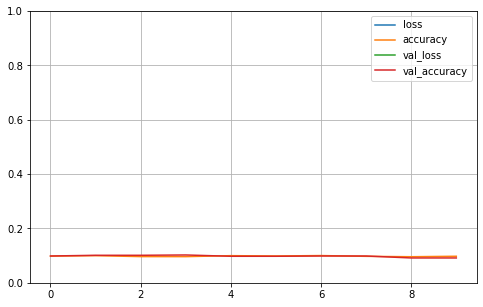

In [19]:
# 我们可以把上面的histoty按照图标的形式打印出来
def plot_learning_curves(history):
    # plot_learning_curves是pandas里面一个很重要的数据结构
    pd.DataFrame(history.history).plot(figsize=(8,5))
    # 显示成网格的形式
    plt.grid(True)
    # 我们设计数据的范围
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)    

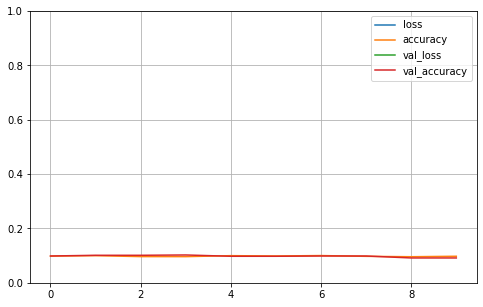

In [18]:
plot_learning_curves(history)    